# **Fuzzy Logic - Pengantar Kecerdasan Buatan - Group 03**

1.   Faiz Rofi Hencya
2.   Muhammad Avtara Khrisna
3.   Muhammad Ali Fikri




## **Linguistic Variables**


### **Input Linguistic**
Kualitas Pelayanan [0 - 100]:
*   Bagus
*   Standar
*   Jelek

Kualitas Makanan [0 - 10]:
*   Enak
*   Lumayan
*   Tidak enak

### **Output Linguistic**

*   Direkomendasikan
*   Rata-rata
*   Tidak Direkomendasi



In [602]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Membership Functions**

In [603]:
#fungsi keanggotaan sigmoid naik
def maximum(x, a, b, c):
  if x <= a:
    return 0
  if x > a and x <= b:
    return 2*((x-a)/(c-a)*(x-a)/(c-a))
  if x > b and x < c:
    return (1 - (2*((x-a)/(c-a)*(x-a)/(c-a))))
  if x >= c:
    return 1

#fungsi keanggotaan sigmoid turun
def minimum(x, a, b, c):
   if x <= a:
    return 1
   if x > a and x <= b:
    return (1 - (2*((x-a)/(c-a)*(x-a)/(c-a))))
   if x > b and x < c:
    return 2*((x-a)/(c-a)*(x-a)/(c-a))
   if x >= c:
    return 0

#fungsi keanggotaan phi
def average(x, c, b):
  if x <= c:
    return minimum(x,(c-b),(c - (b/2)),c)
  if x > c:
    return (1 - (maximum(x,c,(c+(b/2)),(c+b))))

#mendeklarasi minimum pelayanan
def min_pelayanan(x):
  s_min_a = 40
  s_min_b = 20
  s_min_c = 10
  return minimum(x, s_min_a, s_min_b, s_min_c)

#mendeklarasi minimum pelayanan
def avg_pelayanan(x):
  s_avg_b = 90
  s_avg_c = 40
  return average(x, s_avg_c, s_avg_b)

#mendeklarasi maximum pelayanan
def max_pelayanan(x):
  s_max_a = 90
  s_max_b = 65
  s_max_c = 50
  return maximum(x, s_max_a, s_max_b,s_max_c)

#mendeklarasi minimum makanan
def min_makanan(x):
  f_min_a = 5
  f_min_b = 3.5
  f_min_c = 0 
  return minimum(x, f_min_a, f_min_b,f_min_c)

#mendeklarasi rata-rata pelayanan
def avg_makanan(x):
  f_avg_b = 7.5
  f_avg_c = 4.5
  return average(x, f_avg_c, f_avg_b)

#mendeklarasi rata-rata makanan
def max_makanan(x):
  f_max_a = 9
  f_max_b = 7.5
  f_max_c = 6
  return maximum(x, f_max_a, f_max_b,f_max_c)

## **Service Quality Membership Function**

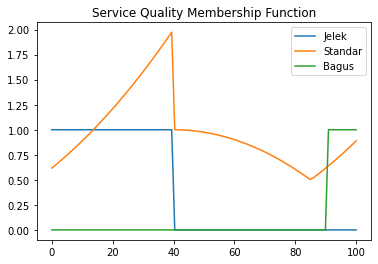

In [604]:
#membuat vektor baris berisi n titik yang terpisah merata secara linear antara x1 dan x2. Jarak antara dua titik sebesar (x2-x1)/(n-1).
s_x = np.linspace(0, 100, 100)
#membuat plot dari data yang sudah di generate
plt.plot(s_x, [min_pelayanan(x) for x in s_x], label="Jelek")
plt.plot(s_x, [avg_pelayanan(x) for x in s_x], label="Standar")
plt.plot(s_x, [max_pelayanan(x) for x in s_x], label="Bagus")
plt.title("Service Quality Membership Function")
plt.legend()
plt.show()

## **Food Quality Membership Function**

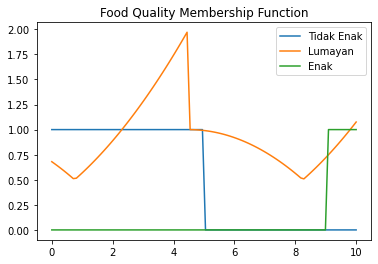

In [605]:
#membuat vektor baris berisi n titik yang terpisah merata secara linear antara x1 dan x2. Jarak antara dua titik sebesar (x2-x1)/(n-1).
f_x = np.linspace(0, 10, 100)
#membuat plot dari data yang sudah di generate
plt.plot(f_x, [min_makanan(x) for x in f_x], label="Tidak Enak")
plt.plot(f_x, [avg_makanan(x) for x in f_x], label="Lumayan")
plt.plot(f_x, [max_makanan(x) for x in f_x], label="Enak")
plt.title("Food Quality Membership Function")
plt.legend()
plt.show()

## **Output Membership Function**

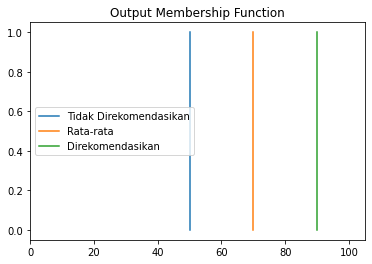

In [611]:
plt.plot([50, 50], [0, 1], label="Tidak Direkomendasikan")
plt.plot([70, 70], [0, 1], label="Rata-rata")
plt.plot([90, 90], [0, 1], label="Direkomendasikan")
plt.xlim(0, 105)
plt.title("Output Membership Function")
plt.legend()
plt.show()

## **Fuzzification**

In [607]:
def fuzzification(data, linguistic):
  fuzz_data = []
  for item in data:
    fuzz_item = {}
    for key in linguistic:
      fuzz_item[key] = linguistic[key](item)
    fuzz_data.append(fuzz_item)
  return fuzz_data

## **Fuzzy Rules**

| service | food | score |
|---------|------| ------|
| Bagus | Enak | Direkomendasikan |
| Bagus | Lumayan | Direkomendasikan |
| Bagus | Tidak Enak | Tidak Recommended |
| Standar | Enak | Direkomendasikan |
| Standar | Lumayan | Rata-rata |
| Standar | Tidak Enak | Tidak Direkomendasikan |
| Jelek | Enak | Rata-rata |
| Jelek | Lumayan | Tidak Direkomendasikan |
| Jelek | Tidak Enak | Tidak Direkomendasikan |

## **Inference**

In [608]:
def inference(data, fuzzy_rules, linguistic_output):
  fuz = []
  for items in zip(*data):
    fuz_all = []
    for rule in fuzzy_rules:
      fuz_all.append({
          "label" : rule["label"],
          "score" : min([items[i][x] for i, x in enumerate(rule["rule"])])
      })
    fuz.append(fuz_all)
    
  score = []
  for items in fuz:
    out_obj = {}
    for label in linguistic_output: 
      out_obj[label] = max(item["score"] for item in items if item["label"] == label)
    score.append(out_obj)

  return score

##**Defuzzification**

In [609]:
def defuzzification(item, linguistic_output):
  return ((item[REKOMENDASI] * 100) + (item[RATA_RATA] * 70) + (item[TIDAK_DIREKOMENDASIKAN] * 50)) / (item[REKOMENDASI] + item[RATA_RATA] + item[TIDAK_DIREKOMENDASIKAN])

## **Main Program**

In [610]:
if __name__ == "__main__":
    #Importing data
    data = pd.read_excel("https://github.com/Hencya/restoran-task2-AI/blob/main/restoran.xlsx?raw=true")

    # Constant, Rules, and Variables 

    BAGUS = "BAGUS"
    STANDAR = "STANDAR"
    JELEK = "JELEK"

    ENAK = "ENAK"
    LUMAYAN = "LUMAYAN"
    TIDAK_ENAK = "TIDAK_ENAK"
  
    REKOMENDASI = "DIREKOMENDASIKAN"
    RATA_RATA = "RATA-RATA"
    TIDAK_DIREKOMENDASIKAN = "TIDAK_DIREKOMENDASIKAN"
    
    linguistic_service = {
      BAGUS: max_pelayanan,
      STANDAR: avg_pelayanan,
      JELEK: min_pelayanan
    }
    
    linguistic_food = {
      ENAK: max_makanan,
      LUMAYAN: avg_makanan,
      TIDAK_ENAK: min_makanan
    }

    linguistic_output = (REKOMENDASI, RATA_RATA, TIDAK_DIREKOMENDASIKAN)

    linguistic  = {
        "pelayanan": linguistic_service,
        "makanan": linguistic_food
    }

    fuzzy_rules = [
      { "label": REKOMENDASI, "rule": (BAGUS, ENAK) },
      { "label": REKOMENDASI, "rule": (BAGUS, LUMAYAN) },
      { "label": TIDAK_DIREKOMENDASIKAN, "rule" : (BAGUS, TIDAK_ENAK) },
      { "label": REKOMENDASI, "rule" : (STANDAR, ENAK) },
      { "label": RATA_RATA, "rule" : (STANDAR, LUMAYAN) },
      { "label": TIDAK_DIREKOMENDASIKAN, "rule" : (STANDAR, TIDAK_ENAK) },
      { "label": RATA_RATA, "rule" : (JELEK, ENAK) },
      { "label": TIDAK_DIREKOMENDASIKAN, "rule" : (JELEK, LUMAYAN) },
      { "label": TIDAK_DIREKOMENDASIKAN, "rule" : (JELEK, TIDAK_ENAK) },
    ]

    # Main Program
    data_temp = data.drop(["id"], axis = 1)
    
    combined_arr = [fuzzification(data[column], linguistic[column]) for column in data_temp]
    score = inference(combined_arr, fuzzy_rules, linguistic_output)
    
    data["score"] = [defuzzification(item, linguistic_output) for item in score]
    data = data.sort_values(by=["score"], ascending=False)

    print(data[:10])

    # Export to Excel
    data = data.drop(["pelayanan", "makanan", "score"], axis=1)
    data[0:10].to_excel("peringkat.xls", index=False, header=False)

    id  pelayanan  makanan      score
41  42         94       10  87.441860
50  51         48       10  85.000000
68  69         86       10  85.000000
24  25         61       10  85.000000
23  24        100        9  85.000000
53  54         64       10  85.000000
19  20         49       10  85.000000
5    6         59       10  85.000000
33  34         93        4  73.712531
51  52         94        3  73.676471
